In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_theme(style="whitegrid")
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc

In [ ]:
data = pd.read_csv('dataset.csv')
data.head()

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


### Exploratory Data Analysis

In [ ]:
df=data
corr = df.corr()
corr.style.background_gradient(cmap='copper')

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
index,1.000000,-0.388317,0.006105,-0.006281,-0.169478,-0.003363,-0.007340,0.234091,-0.006682,-0.001180,0.007293,0.001656,0.002916,-0.000862,-0.005071,-0.028865,0.085354,0.005828,0.003228,0.016804,0.003649,-0.005265,0.006515,0.002533,0.115320,0.400890,-0.014900,0.065117,-0.012527,0.002442,0.163799,0.000978
having_IPhaving_IP_Address,-0.388317,1.000000,-0.052411,0.403461,0.158699,0.397389,-0.005257,-0.080745,0.071414,-0.022739,0.087025,0.060979,0.363534,0.029773,0.099847,0.006212,-0.010962,0.077989,0.336549,-0.321181,0.084059,0.042881,0.096882,0.054694,-0.010446,-0.050733,0.002922,-0.091774,0.029153,-0.339065,-0.019103,0.094160
URLURL_Length,0.006105,-0.052411,1.000000,-0.097881,-0.075108,-0.081247,0.055247,0.003997,0.048754,-0.221892,-0.042497,0.000323,-0.089383,0.246348,-0.023396,0.052869,0.414196,-0.014457,-0.106761,0.046832,-0.045103,-0.013613,-0.049381,-0.013838,0.179426,-0.040823,0.008993,0.183518,0.002902,-0.022987,-0.067153,0.057430
Shortining_Service,-0.006281,0.403461,-0.097881,1.000000,0.104447,0.842796,-0.080471,-0.041916,-0.061426,0.060923,0.006101,0.002201,0.757838,-0.037235,0.000561,-0.133379,-0.022723,0.049328,0.739290,-0.534530,0.062383,0.038118,0.036616,0.016581,-0.052596,0.436064,-0.047074,0.014591,0.155844,-0.198410,0.085461,-0.067966
having_At_Symbol,-0.169478,0.158699,-0.075108,0.104447,1.000000,0.086960,-0.011726,-0.058976,0.031220,0.015522,0.304899,0.364891,0.104561,0.027909,0.057914,-0.070861,-0.008672,0.370123,0.203945,-0.028160,0.279697,0.219503,0.290893,0.284410,-0.005499,-0.047872,0.032918,-0.064735,0.037061,-0.006080,-0.080357,0.052948
double_slash_redirecting,-0.003363,0.397389,-0.081247,0.842796,0.086960,1.000000,-0.085590,-0.043079,-0.036200,0.047464,0.035100,0.025060,0.760799,-0.026368,-0.005036,-0.125583,-0.041672,0.031898,0.723724,-0.591478,0.086635,0.025863,0.054463,0.010459,-0.050107,0.431409,-0.062369,-0.003132,0.178415,-0.194165,0.070390,-0.038608
Prefix_Suffix,-0.007340,-0.005257,0.055247,-0.080471,-0.011726,-0.085590,1.000000,0.087891,0.261391,-0.096799,-0.007504,-0.022546,-0.070153,0.098675,0.348871,0.100254,0.001326,-0.045000,-0.077620,0.016271,0.012578,-0.024868,-0.014733,-0.036904,0.074116,-0.016556,0.110598,-0.006834,0.067781,0.067423,-0.002763,0.348606
having_Sub_Domain,0.234091,-0.080745,0.003997,-0.041916,-0.058976,-0.043079,0.087891,1.000000,0.267649,-0.082839,-0.016704,0.004863,-0.037239,0.104857,0.229491,0.093646,0.096089,0.008830,-0.034908,0.031206,-0.018082,0.018230,-0.025312,0.010637,0.119254,0.125493,-0.005764,0.120730,0.057673,-0.010526,0.081627,0.298323
SSLfinal_State,-0.006682,0.071414,0.048754,-0.061426,0.031220,-0.036200,0.261391,0.267649,1.000000,-0.193622,-0.014757,0.027473,-0.029941,0.193054,0.535786,0.176825,0.171402,0.008062,-0.046245,-0.021070,0.023586,0.015854,-0.013005,-0.002773,0.162809,0.050972,0.258768,0.074545,0.096051,-0.011710,0.063411,0.714741
Domain_registeration_length,-0.001180,-0.022739,-0.221892,0.060923,0.015522,0.047464,-0.096799,-0.082839,-0.193622,1.000000,0.054253,0.022478,0.059161,-0.609970,-0.160257,-0.101084,-0.136422,0.039260,0.058109,-0.016300,0.023784,0.023520,0.051410,0.004393,-0.062851,-0.010477,-0.134454,-0.059898,-0.039766,0.122672,-0.002212,-0.225789


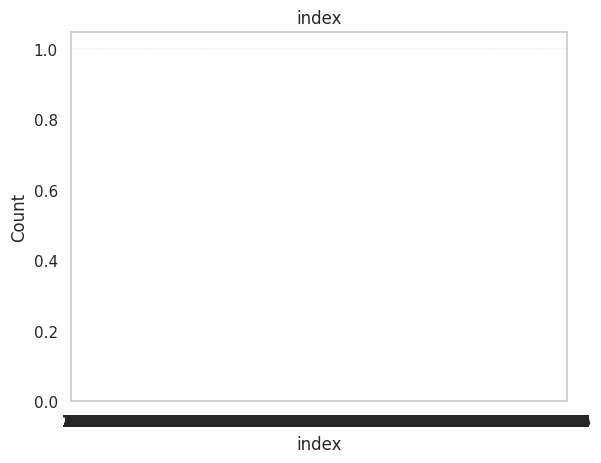

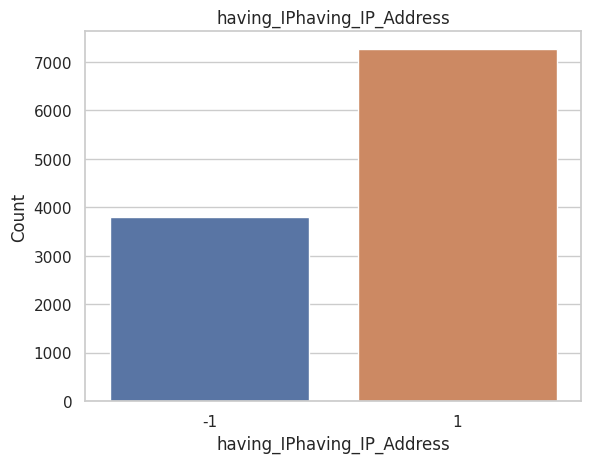

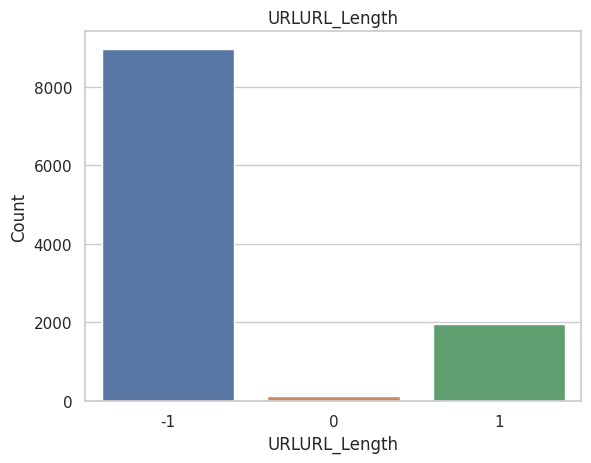

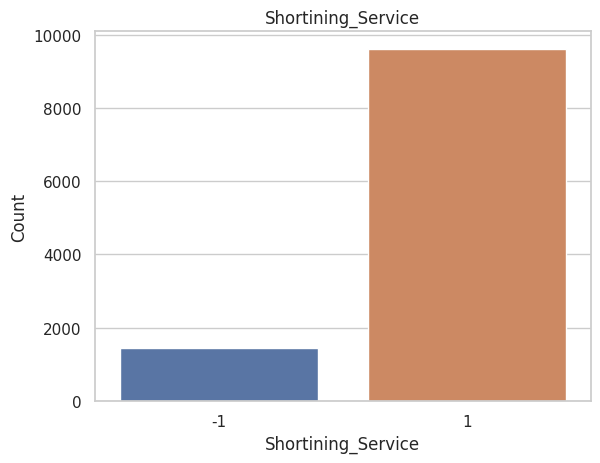

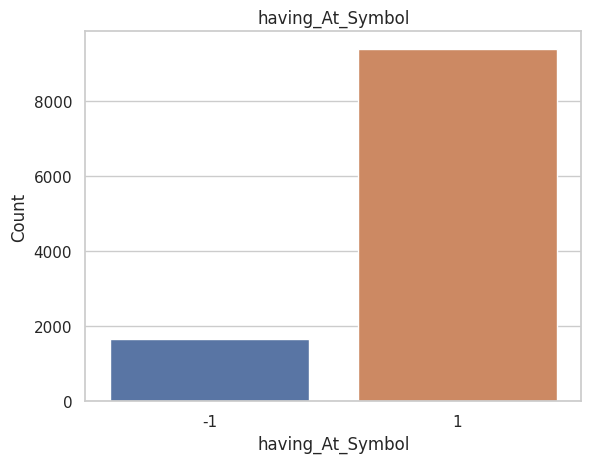

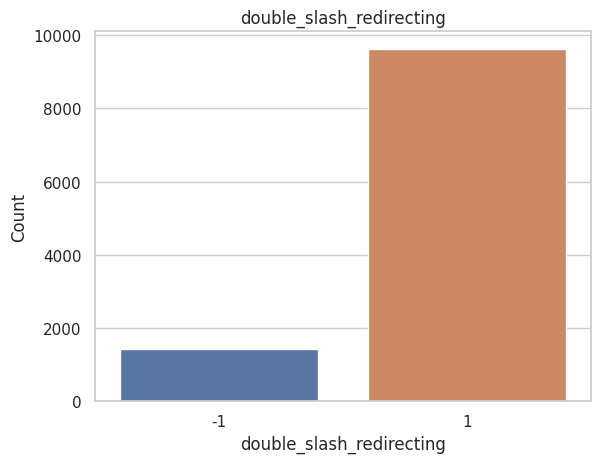

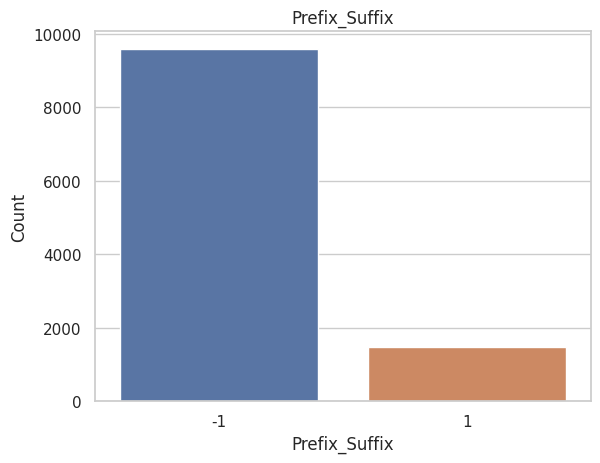

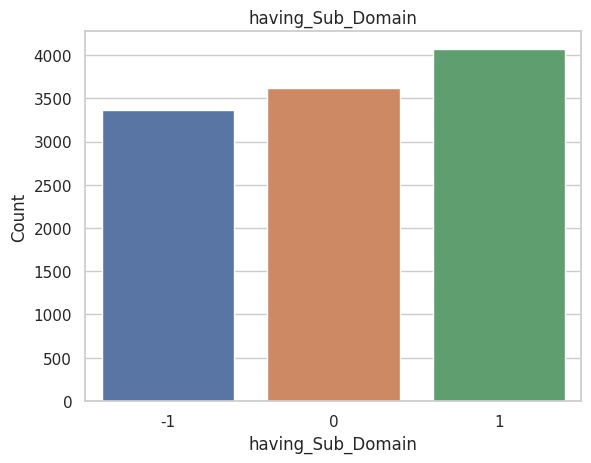

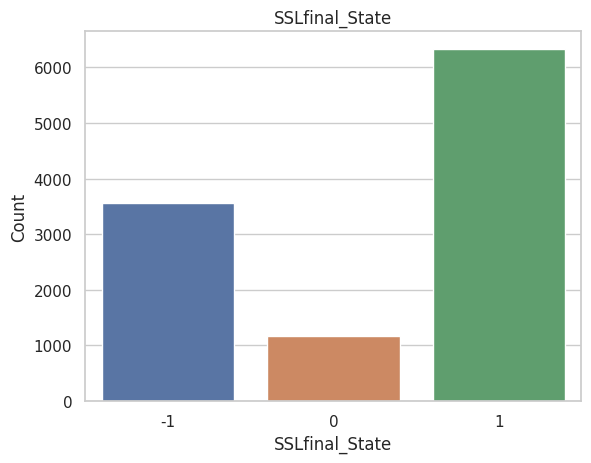

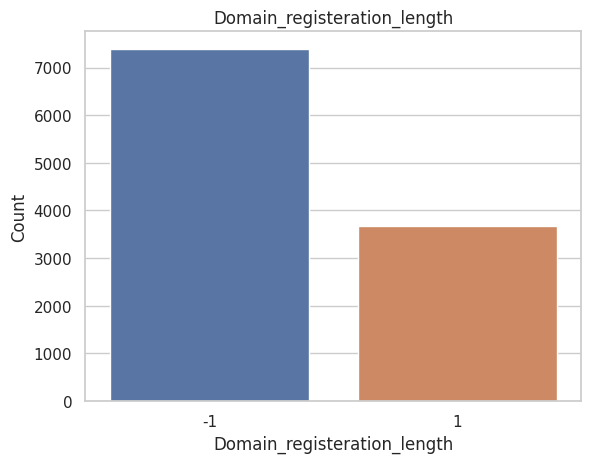

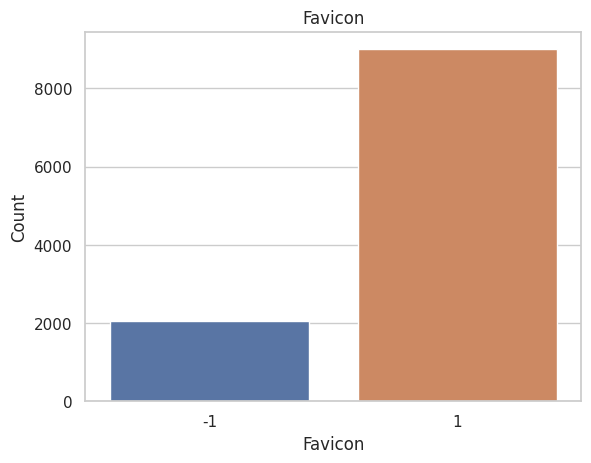

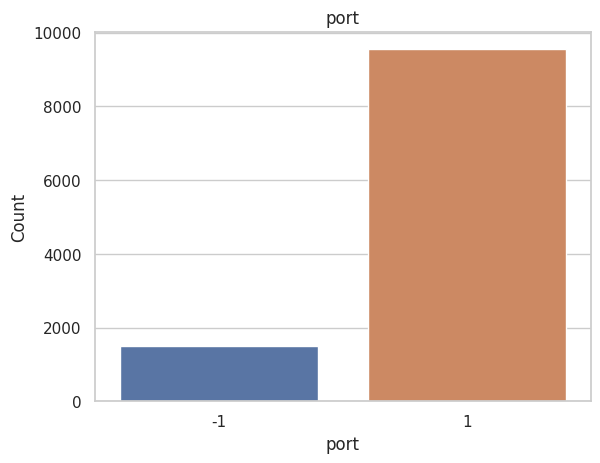

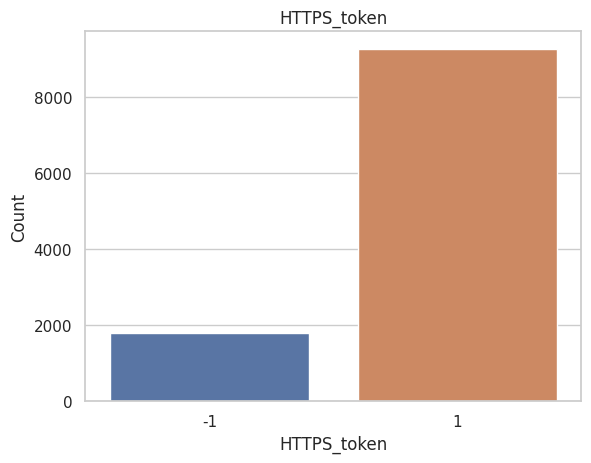

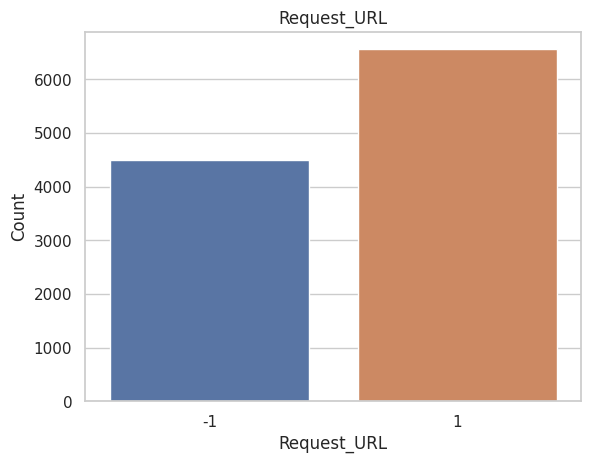

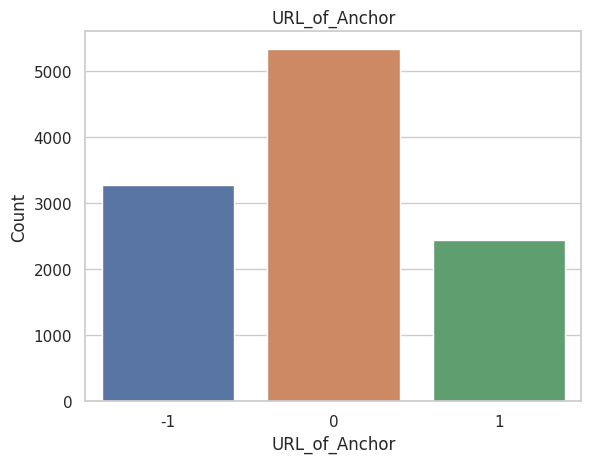

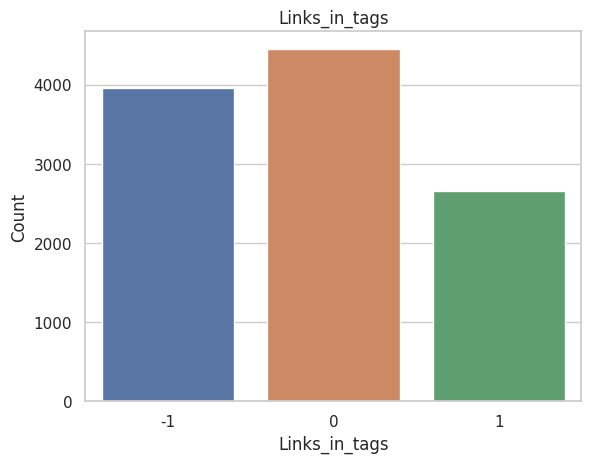

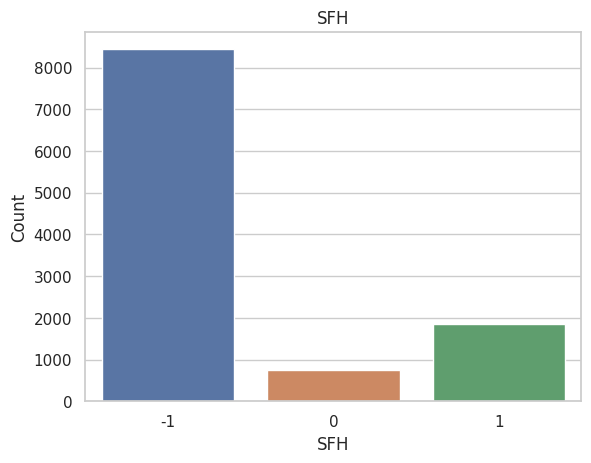

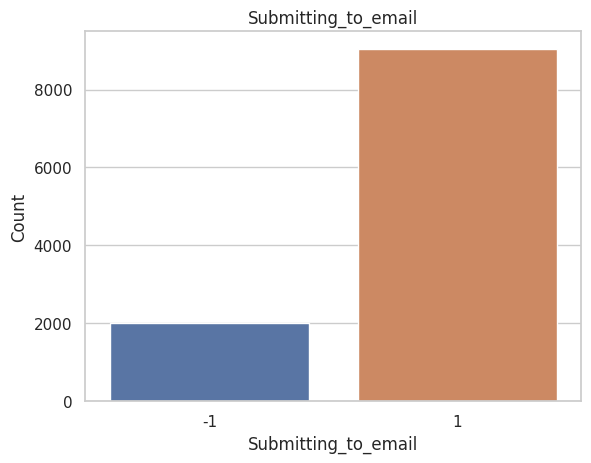

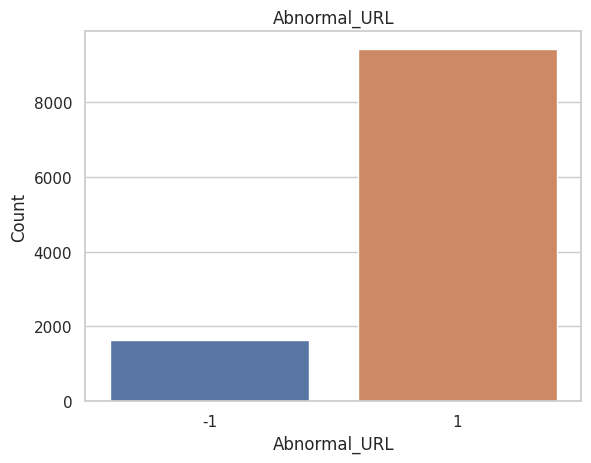

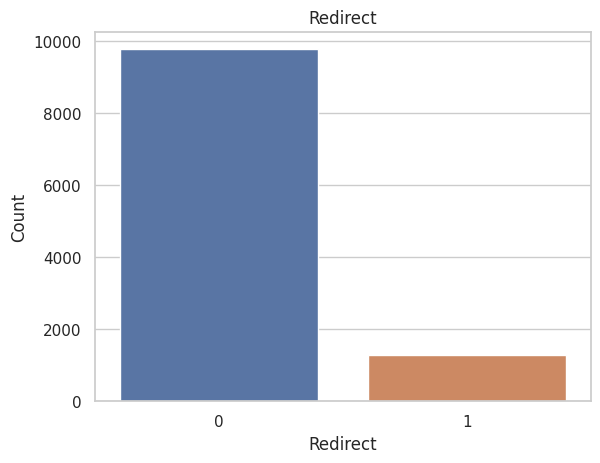

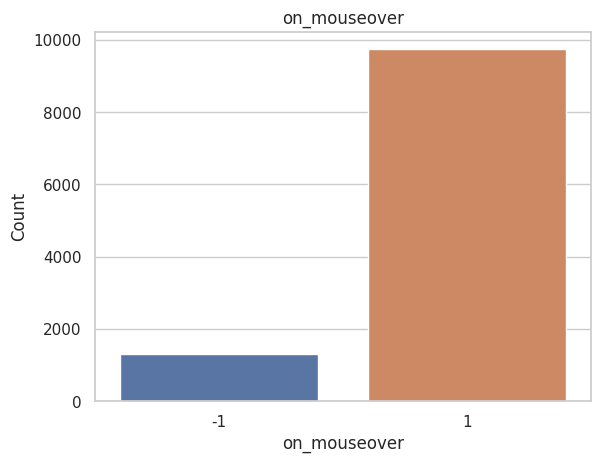

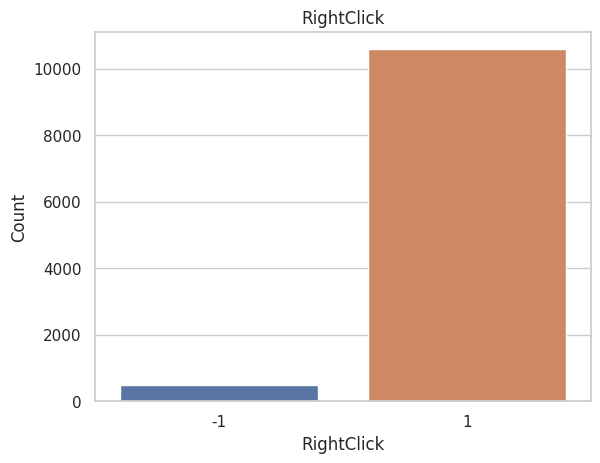

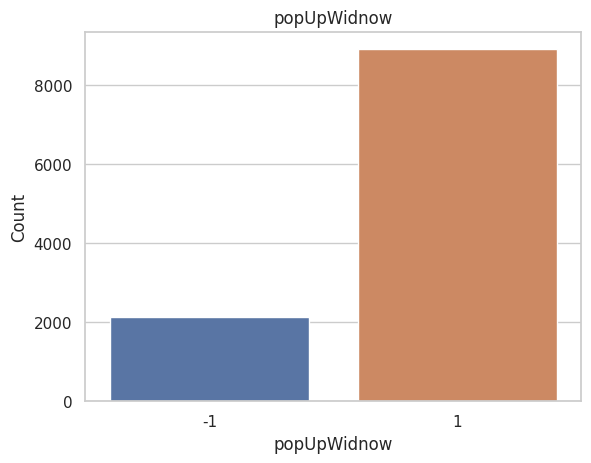

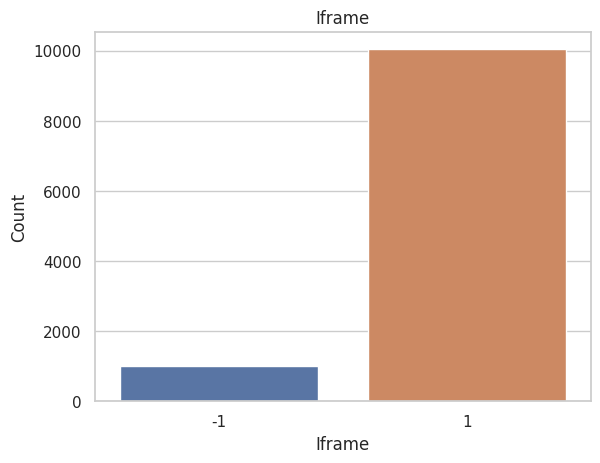

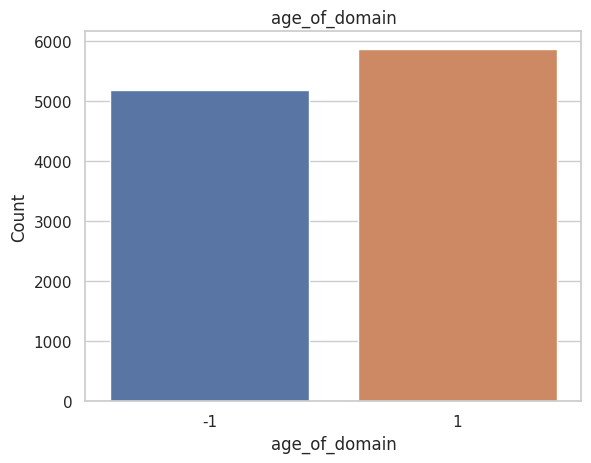

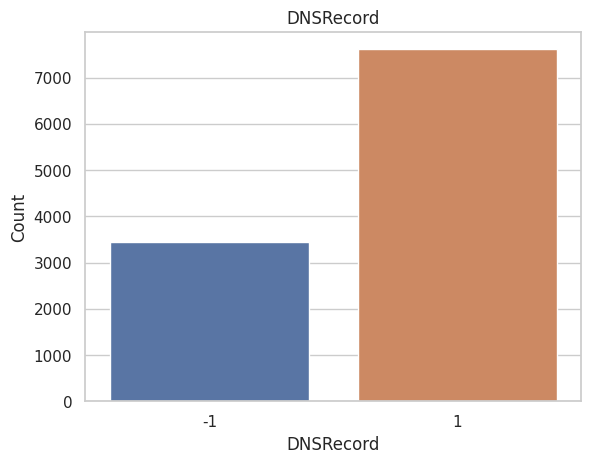

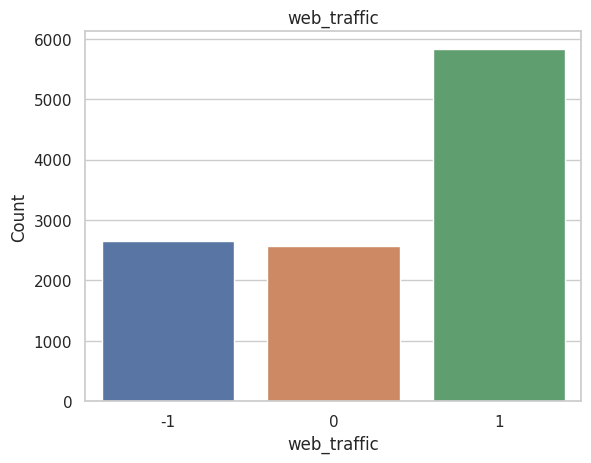

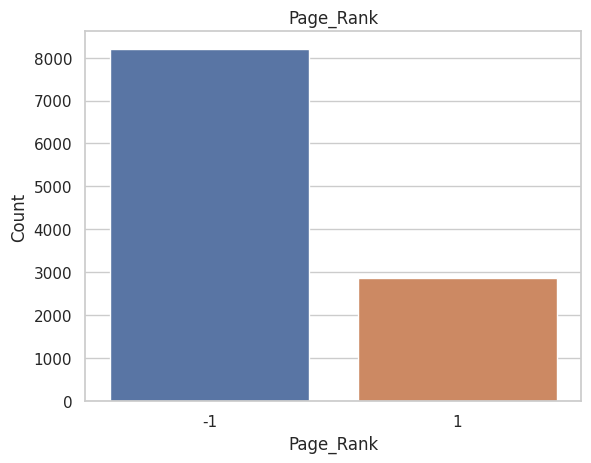

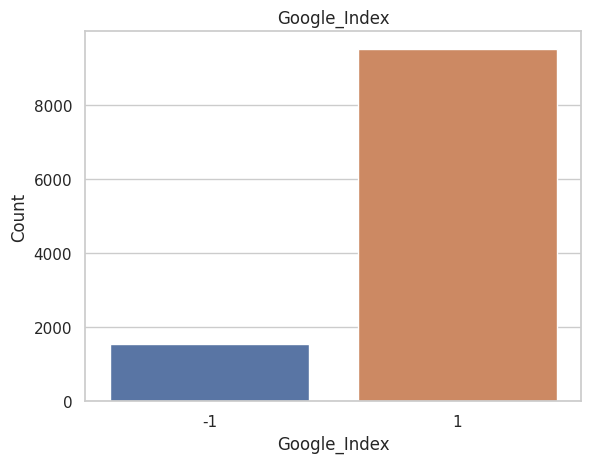

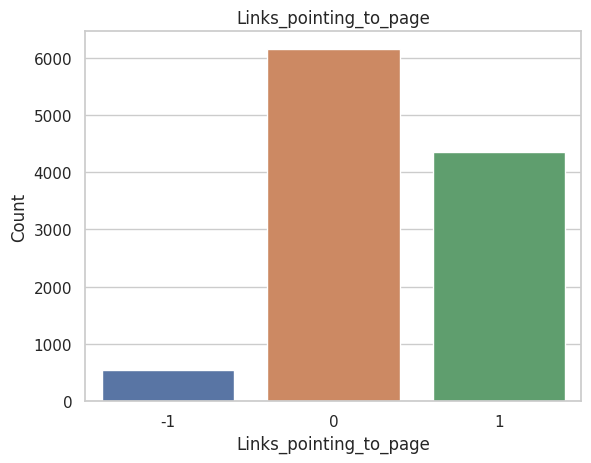

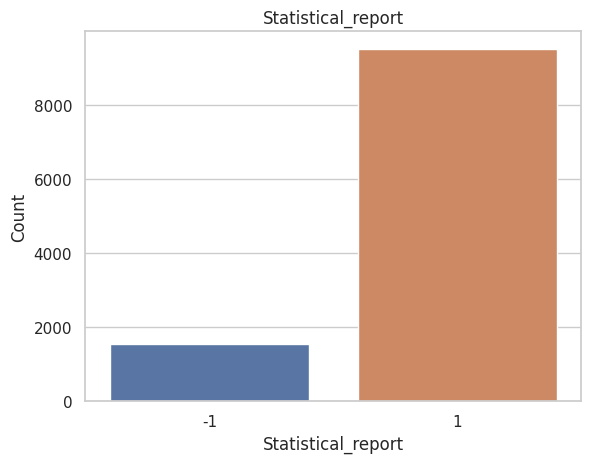

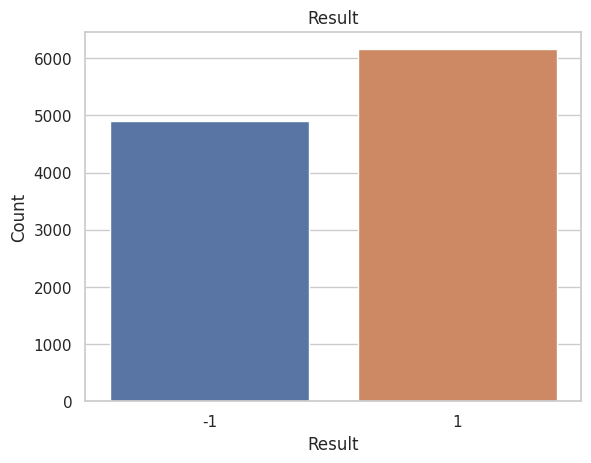

In [ ]:
# Loop through each column and create histograms
for column in df.columns:
    plt.figure()  # Create a new figure for each column
    sns.countplot(x=df[column])
    # df[column].value_counts().plot(kind='bar')
    plt.title(f'{column}')
    plt.xlabel(f'{column}')
    plt.ylabel('Count')
    plt.show()

In [ ]:
for column in df.columns:
    unique_values = df[column].unique()
    value_counts = df[column].value_counts()
    print(f"Column: {column}")
    for value, count in zip(unique_values, value_counts):
        print(f"Value: {value}, Count: {count}")
    print()

Streaming output truncated to the last 5000 lines.
Value: 6189, Count: 1
Value: 6190, Count: 1
Value: 6191, Count: 1
Value: 6192, Count: 1
Value: 6193, Count: 1
Value: 6194, Count: 1
Value: 6195, Count: 1
Value: 6196, Count: 1
Value: 6197, Count: 1
Value: 6198, Count: 1
Value: 6199, Count: 1
Value: 6200, Count: 1
Value: 6201, Count: 1
Value: 6202, Count: 1
Value: 6203, Count: 1
Value: 6204, Count: 1
Value: 6205, Count: 1
Value: 6206, Count: 1
Value: 6207, Count: 1
Value: 6208, Count: 1
Value: 6209, Count: 1
Value: 6210, Count: 1
Value: 6211, Count: 1
Value: 6212, Count: 1
Value: 6213, Count: 1
Value: 6214, Count: 1
Value: 6215, Count: 1
Value: 6216, Count: 1
Value: 6217, Count: 1
Value: 6218, Count: 1
Value: 6219, Count: 1
Value: 6220, Count: 1
Value: 6221, Count: 1
Value: 6222, Count: 1
Value: 6223, Count: 1
Value: 6224, Count: 1
Value: 6225, Count: 1
Value: 6226, Count: 1
Value: 6227, Count: 1
Value: 6228, Count: 1
Value: 6229, Count: 1
Value: 6230, Count: 1
Value: 6231, Count: 1
Val

In [ ]:
df.shape

(11055, 32)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   index                        11055 non-null  int64
 1   having_IPhaving_IP_Address   11055 non-null  int64
 2   URLURL_Length                11055 non-null  int64
 3   Shortining_Service           11055 non-null  int64
 4   having_At_Symbol             11055 non-null  int64
 5   double_slash_redirecting     11055 non-null  int64
 6   Prefix_Suffix                11055 non-null  int64
 7   having_Sub_Domain            11055 non-null  int64
 8   SSLfinal_State               11055 non-null  int64
 9   Domain_registeration_length  11055 non-null  int64
 10  Favicon                      11055 non-null  int64
 11  port                         11055 non-null  int64
 12  HTTPS_token                  11055 non-null  int64
 13  Request_URL                  11055 non-null  i

In [ ]:
df.describe()

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,...,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000
mean,5528.000000,0.313795,-0.633198,0.738761,0.700588,0.741474,-0.734962,0.063953,0.250927,-0.336771,...,0.613388,0.816915,0.061239,0.377114,0.287291,-0.483673,0.721574,0.344007,0.719584,0.113885
std,3191.447947,0.949534,0.766095,0.673998,0.713598,0.671011,0.678139,0.817518,0.911892,0.941629,...,0.789818,0.576784,0.998168,0.926209,0.827733,0.875289,0.692369,0.569944,0.694437,0.993539
min,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,2764.500000,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,5528.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,8291.500000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,11055.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.isna().sum()

index                          0
having_IPhaving_IP_Address     0
URLURL_Length                  0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistica

In [ ]:
corr = df.corr()
corr.style.background_gradient(cmap='copper')

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
index,1.000000,-0.388317,0.006105,-0.006281,-0.169478,-0.003363,-0.007340,0.234091,-0.006682,-0.001180,0.007293,0.001656,0.002916,-0.000862,-0.005071,-0.028865,0.085354,0.005828,0.003228,0.016804,0.003649,-0.005265,0.006515,0.002533,0.115320,0.400890,-0.014900,0.065117,-0.012527,0.002442,0.163799,0.000978
having_IPhaving_IP_Address,-0.388317,1.000000,-0.052411,0.403461,0.158699,0.397389,-0.005257,-0.080745,0.071414,-0.022739,0.087025,0.060979,0.363534,0.029773,0.099847,0.006212,-0.010962,0.077989,0.336549,-0.321181,0.084059,0.042881,0.096882,0.054694,-0.010446,-0.050733,0.002922,-0.091774,0.029153,-0.339065,-0.019103,0.094160
URLURL_Length,0.006105,-0.052411,1.000000,-0.097881,-0.075108,-0.081247,0.055247,0.003997,0.048754,-0.221892,-0.042497,0.000323,-0.089383,0.246348,-0.023396,0.052869,0.414196,-0.014457,-0.106761,0.046832,-0.045103,-0.013613,-0.049381,-0.013838,0.179426,-0.040823,0.008993,0.183518,0.002902,-0.022987,-0.067153,0.057430
Shortining_Service,-0.006281,0.403461,-0.097881,1.000000,0.104447,0.842796,-0.080471,-0.041916,-0.061426,0.060923,0.006101,0.002201,0.757838,-0.037235,0.000561,-0.133379,-0.022723,0.049328,0.739290,-0.534530,0.062383,0.038118,0.036616,0.016581,-0.052596,0.436064,-0.047074,0.014591,0.155844,-0.198410,0.085461,-0.067966
having_At_Symbol,-0.169478,0.158699,-0.075108,0.104447,1.000000,0.086960,-0.011726,-0.058976,0.031220,0.015522,0.304899,0.364891,0.104561,0.027909,0.057914,-0.070861,-0.008672,0.370123,0.203945,-0.028160,0.279697,0.219503,0.290893,0.284410,-0.005499,-0.047872,0.032918,-0.064735,0.037061,-0.006080,-0.080357,0.052948
double_slash_redirecting,-0.003363,0.397389,-0.081247,0.842796,0.086960,1.000000,-0.085590,-0.043079,-0.036200,0.047464,0.035100,0.025060,0.760799,-0.026368,-0.005036,-0.125583,-0.041672,0.031898,0.723724,-0.591478,0.086635,0.025863,0.054463,0.010459,-0.050107,0.431409,-0.062369,-0.003132,0.178415,-0.194165,0.070390,-0.038608
Prefix_Suffix,-0.007340,-0.005257,0.055247,-0.080471,-0.011726,-0.085590,1.000000,0.087891,0.261391,-0.096799,-0.007504,-0.022546,-0.070153,0.098675,0.348871,0.100254,0.001326,-0.045000,-0.077620,0.016271,0.012578,-0.024868,-0.014733,-0.036904,0.074116,-0.016556,0.110598,-0.006834,0.067781,0.067423,-0.002763,0.348606
having_Sub_Domain,0.234091,-0.080745,0.003997,-0.041916,-0.058976,-0.043079,0.087891,1.000000,0.267649,-0.082839,-0.016704,0.004863,-0.037239,0.104857,0.229491,0.093646,0.096089,0.008830,-0.034908,0.031206,-0.018082,0.018230,-0.025312,0.010637,0.119254,0.125493,-0.005764,0.120730,0.057673,-0.010526,0.081627,0.298323
SSLfinal_State,-0.006682,0.071414,0.048754,-0.061426,0.031220,-0.036200,0.261391,0.267649,1.000000,-0.193622,-0.014757,0.027473,-0.029941,0.193054,0.535786,0.176825,0.171402,0.008062,-0.046245,-0.021070,0.023586,0.015854,-0.013005,-0.002773,0.162809,0.050972,0.258768,0.074545,0.096051,-0.011710,0.063411,0.714741
Domain_registeration_length,-0.001180,-0.022739,-0.221892,0.060923,0.015522,0.047464,-0.096799,-0.082839,-0.193622,1.000000,0.054253,0.022478,0.059161,-0.609970,-0.160257,-0.101084,-0.136422,0.039260,0.058109,-0.016300,0.023784,0.023520,0.051410,0.004393,-0.062851,-0.010477,-0.134454,-0.059898,-0.039766,0.122672,-0.002212,-0.225789


In [ ]:
df1 = df[['Shortining_Service', 'double_slash_redirecting','SSLfinal_State','Favicon','port','HTTPS_token','Submitting_to_email',
   'Abnormal_URL', 'on_mouseover', 'popUpWidnow','Result']]
corr = df1.corr()
corr.style.background_gradient(cmap='copper')

,Shortining_Service,double_slash_redirecting,SSLfinal_State,Favicon,port,HTTPS_token,Submitting_to_email,Abnormal_URL,on_mouseover,popUpWidnow,Result
Shortining_Service,1.000000,0.842796,-0.061426,0.006101,0.002201,0.757838,0.049328,0.739290,0.062383,0.036616,-0.067966
double_slash_redirecting,0.842796,1.000000,-0.036200,0.035100,0.025060,0.760799,0.031898,0.723724,0.086635,0.054463,-0.038608
SSLfinal_State,-0.061426,-0.036200,1.000000,-0.014757,0.027473,-0.029941,0.008062,-0.046245,0.023586,-0.013005,0.714741
Favicon,0.006101,0.035100,-0.014757,1.000000,0.803834,0.049483,0.668317,0.071848,0.706179,0.939633,-0.000280
port,0.002201,0.025060,0.027473,0.803834,1.000000,0.004999,0.799088,0.054126,0.623298,0.748517,0.036419
HTTPS_token,0.757838,0.760799,-0.029941,0.049483,0.004999,1.000000,0.075478,0.716287,0.110113,0.066957,-0.039854
Submitting_to_email,0.049328,0.031898,0.008062,0.668317,0.799088,0.075478,1.000000,0.195850,0.531656,0.629462,0.018249
Abnormal_URL,0.739290,0.723724,-0.046245,0.071848,0.054126,0.716287,0.195850,1.000000,0.117638,0.091188,-0.060488
on_mouseover,0.062383,0.086635,0.023586,0.706179,0.623298,0.110113,0.531656,0.117638,1.000000,0.733629,0.041838
popUpWidnow,0.036616,0.054463,-0.013005,0.939633,0.748517,0.066957,0.629462,0.091188,0.733629,1.000000,0.000086


Shortining_Service -->Abnormal_URL,HTTPS_token,double_slash_redirecting

double_slash_redirecting -->Shortining_Service,HTTPS_token,Abnormal_URL

SSLfinal_State -->Result

Favicon --> port,popUpWidnow,on_mouseover

port --> Submitting_to_email,popUpWidnow

popUpWidnow --> Favicon, port, on_mouseover

HTTPS_token --> Shortining_Service,double_slash_redirecting, Abnormal_URL

Abnormal_URL --> Shortining_Service, double_slash_redirecting, HTTPS_token

on_mouseover --> Favicon, popUpWidnow



Result --> SSLfinal_State

In [ ]:
df2 = df[['Shortining_Service', 'double_slash_redirecting','HTTPS_token','Abnormal_URL','Result']]
corr = df2.corr()
corr.style.background_gradient(cmap='copper')

,Shortining_Service,double_slash_redirecting,HTTPS_token,Abnormal_URL,Result
Shortining_Service,1.000000,0.842796,0.757838,0.739290,-0.067966
double_slash_redirecting,0.842796,1.000000,0.760799,0.723724,-0.038608
HTTPS_token,0.757838,0.760799,1.000000,0.716287,-0.039854
Abnormal_URL,0.739290,0.723724,0.716287,1.000000,-0.060488
Result,-0.067966,-0.038608,-0.039854,-0.060488,1.000000


column **Shortining_Service** and **double_slash_redirecting** are correlated hence will drop column **shortining_service** has the column **double_slash_redirecting** is more correlated to the **result** column

In [ ]:
# Favicon --> port,popUpWidnow,on_mouseover
df2 = df[['Favicon', 'port','popUpWidnow','on_mouseover','Result']]
corr = df2.corr()
corr.style.background_gradient(cmap='copper')

,Favicon,port,popUpWidnow,on_mouseover,Result
Favicon,1.000000,0.803834,0.939633,0.706179,-0.000280
port,0.803834,1.000000,0.748517,0.623298,0.036419
popUpWidnow,0.939633,0.748517,1.000000,0.733629,0.000086
on_mouseover,0.706179,0.623298,0.733629,1.000000,0.041838
Result,-0.000280,0.036419,0.000086,0.041838,1.000000


column  **popUpWidnow** and **Favicon** are correlated hence will drop column **Favicon**  has the column **popUpWidnow** is more correlated to the **result** column

In [ ]:
# HTTPS_token --> Shortining_Service,double_slash_redirecting, Abnormal_URL
df2 = df[['HTTPS_token', 'Shortining_Service','double_slash_redirecting','Abnormal_URL','Result']]
corr = df2.corr()
corr.style.background_gradient(cmap='copper')

,HTTPS_token,Shortining_Service,double_slash_redirecting,Abnormal_URL,Result
HTTPS_token,1.000000,0.757838,0.760799,0.716287,-0.039854
Shortining_Service,0.757838,1.000000,0.842796,0.739290,-0.067966
double_slash_redirecting,0.760799,0.842796,1.000000,0.723724,-0.038608
Abnormal_URL,0.716287,0.739290,0.723724,1.000000,-0.060488
Result,-0.039854,-0.067966,-0.038608,-0.060488,1.000000


column  **HTTPS_token** and **double_slash_redirecting** are correlated hence will drop column **HTTPS_token**  has the column **double_slash_redirecting** is more correlated to the **result** column

In [ ]:
df.columns

Index(['index', 'having_IPhaving_IP_Address', 'URLURL_Length',
       'Shortining_Service', 'having_At_Symbol', 'double_slash_redirecting',
       'Prefix_Suffix', 'having_Sub_Domain', 'SSLfinal_State',
       'Domain_registeration_length', 'Favicon', 'port', 'HTTPS_token',
       'Request_URL', 'URL_of_Anchor', 'Links_in_tags', 'SFH',
       'Submitting_to_email', 'Abnormal_URL', 'Redirect', 'on_mouseover',
       'RightClick', 'popUpWidnow', 'Iframe', 'age_of_domain', 'DNSRecord',
       'web_traffic', 'Page_Rank', 'Google_Index', 'Links_pointing_to_page',
       'Statistical_report', 'Result'],
      dtype='object')

In [ ]:
df1=df
df1.drop(['index','Shortining_Service','Favicon','HTTPS_token'],axis =1,inplace=True)

In [ ]:
df1.head()

,having_IPhaving_IP_Address,URLURL_Length,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,port,Request_URL,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,-1,-1,-1,-1,-1,1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,-1,0,1,-1,1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,-1,-1,-1,-1,1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,-1,-1,-1,1,1,-1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,1,1,-1,1,1,-1,1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [ ]:
df1.columns

Index(['having_IPhaving_IP_Address', 'URLURL_Length', 'having_At_Symbol',
       'double_slash_redirecting', 'Prefix_Suffix', 'having_Sub_Domain',
       'SSLfinal_State', 'Domain_registeration_length', 'port', 'Request_URL',
       'URL_of_Anchor', 'Links_in_tags', 'SFH', 'Submitting_to_email',
       'Abnormal_URL', 'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow',
       'Iframe', 'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report',
       'Result'],
      dtype='object')

In [ ]:
X = df1[['having_IPhaving_IP_Address', 'URLURL_Length','having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length','port', 'Request_URL', 'URL_of_Anchor', 'Links_in_tags', 'SFH',
       'Submitting_to_email', 'Abnormal_URL', 'Redirect', 'on_mouseover','RightClick', 'popUpWidnow', 'Iframe', 'age_of_domain', 'DNSRecord',
       'web_traffic', 'Page_Rank', 'Google_Index', 'Links_pointing_to_page','Statistical_report']]

y=df1['Result']

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=41)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier to the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", classification_rep)
print(cross_val_score(rf_classifier, X, y, scoring = 'accuracy', cv = 10))

Accuracy: 97.41%
Confusion Matrix:
 [[1406   59]
 [  27 1825]]
Classification Report:
               precision    recall  f1-score   support

          -1       0.98      0.96      0.97      1465
           1       0.97      0.99      0.98      1852

    accuracy                           0.97      3317
   macro avg       0.97      0.97      0.97      3317
weighted avg       0.97      0.97      0.97      3317

[0.98372514 0.98372514 0.97016275 0.98462929 0.98282098 0.97375566
 0.96561086 0.95294118 0.96199095 0.96289593]


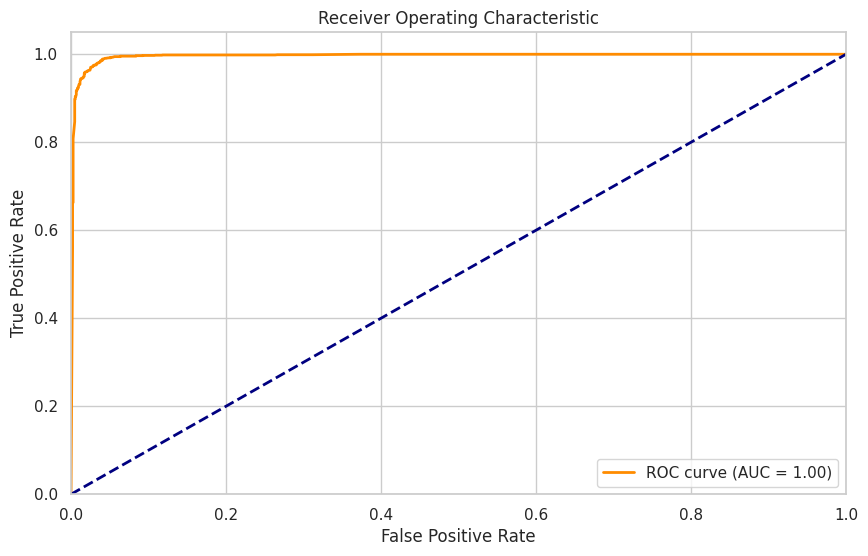

In [ ]:
# Get predicted probabilities for positive class
y_score = rf_classifier.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [ ]:
X = df1[['having_IPhaving_IP_Address', 'URLURL_Length','having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length','port', 'Request_URL', 'URL_of_Anchor', 'Links_in_tags', 'SFH',
       'Submitting_to_email', 'Abnormal_URL', 'Redirect', 'on_mouseover','RightClick', 'popUpWidnow', 'Iframe', 'age_of_domain', 'DNSRecord',
       'web_traffic', 'Page_Rank', 'Google_Index', 'Links_pointing_to_page','Statistical_report']]

y=df1['Result']

In [ ]:
num_folds = 5

# Create a KFold object
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Initialize lists to store ROC curve data
all_fpr = []
all_tpr = []
mean_auc = 0
accuracies = []

In [ ]:
X1 = X.to_numpy()
X1

array([[-1,  1,  1, ...,  1,  1, -1],
       [ 1,  1,  1, ...,  1,  1,  1],
       [ 1,  0,  1, ...,  1,  0, -1],
       ...,
       [ 1, -1,  1, ...,  1,  0,  1],
       [-1, -1,  1, ...,  1,  1,  1],
       [-1, -1,  1, ..., -1,  1, -1]])

In [ ]:
y1 = y.to_numpy()
y1

array([-1, -1, -1, ..., -1, -1, -1])

In [ ]:
# Iterate through each fold
for train_index, test_index in kf.split(X1):
    X_train, X_test = X1[train_index], X1[test_index]
    y_train, y_test = y1[train_index], y1[test_index]

    # Create a Random Forest classifier
    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

    # Fit the classifier to the training data
    rf_classifier.fit(X_train, y_train)


    # Make predictions on the test data
    y_pred = rf_classifier.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Calculate the mean and standard deviation of accuracy
mean_accuracy = sum(accuracies) / num_folds
std_accuracy = (sum((acc - mean_accuracy) ** 2 for acc in accuracies) / num_folds) ** 0.5

# Print the results
print("Mean Accuracy: {:.2f}%".format(mean_accuracy * 100))
print("Standard Deviation of Accuracy: {:.2f}".format(std_accuracy))

Mean Accuracy: 97.18%
Standard Deviation of Accuracy: 0.00


The above model **without Kfolds** has **96.86%** and **with KFold** has 97.18% which gives maximum accuracy on the validation dataset with selected attributes.